<h1 align = 'center'> Jupyter ile Yapay Sinir Ağları  </h1>
<h2 align = 'center'> Kısım 4: Geri Yayılım </h2>

<h4 align = 'center' > Welch Labs </h4>


<h3 align = 'center'> Variables </h3>

| Sembol | Matematiksel İfade | Tanım | Boyutlar
| :-: | :-: | :-: | :-: |
|X|$$X$$|Giriş Verileri| (numExamples, inputLayerSize)|
|y |$$y$$|Hedef Veri|(numExamples, outputLayerSize)|
|W1 | $$W^{(1)}$$ | Katman 1 ağırlıkları | (inputLayerSize, hiddenLayerSize) |
|W2 | $$W^{(2)}$$ | Katman 2 ağırlıkları | (hiddenLayerSize, outputLayerSize) |
|z2 | $$z^{(2)}$$ | Katman 2 aktivasyonu | (numExamples, hiddenLayerSize) |
|a2 | $$a^{(2)}$$ | Katman 2 aktivitesi | (numExamples, hiddenLayerSize) |
|z3 | $$z^{(3)}$$ | Katman 3 aktivasyonu | (numExamples, outputLayerSize) |
|J | $$J$$ | Maliyet | (1, outputLayerSize) |
|dJdz3 | $$\frac{\partial J}{\partial z^{(3)} } = \delta^{(3)}$$ | Maliyetin  $z^{(3)}$ 'e göre kısmi türevi| (numExamples,outputLayerSize)|
|dJdW2|$$\frac{\partial J}{\partial W^{(2)}}$$|Maliyetin $W^{(2)}$ e göre kısmi türevi|(hiddenLayerSize, outputLayerSize)|
|dz3dz2|$$\frac{\partial z^{(3)}}{\partial z^{(2)}}$$| $z^{(3)}$ ün $z^{(2)}$ e göre kısmi türevi|(numExamples, hiddenLayerSize)|
|dJdW1|$$\frac{\partial J}{\partial W^{(1)}}$$|Maliyetin $W^{(1)}$ e göre kısmi türevi|(inputLayerSize, hiddenLayerSize)|
|delta2|$$\delta^{(2)}$$|Geriyayılım Hata 2|(numExamples,hiddenLayerSize)|
|delta3|$$\delta^{(3)}$$|Geriyayılım Hata 1|(numExamples,outputLayerSize)|

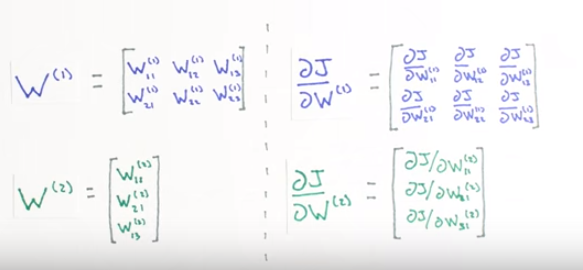

In [74]:
from IPython.display import Image
i = Image(filename='images/kısmimaliyetturev.png')
i

Ağırlıklarımız W1 ve W2 olmak üzere iki matrise ayrılmış durumda. Ağırlıklara göre maliyet fonksiyonlarının kısmi türevlerini dJdW1 ve dJdW2 için ayrı ayrı hesaplamamız gerekiyor. Ağırlık değerlerimiz kadar gradyen değerlerimiz de olduğunda, dJdW1 ve dJdW2 , W1 ve W2 aynı boyutta matrisler olacaktır.

$$
\frac{\partial J}{\partial W^{(2)}} = \frac{\partial \sum \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}}
$$

$$
\frac{\partial J}{\partial W^{(2)}} = \sum \frac{\partial \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}}
$$

Zincir kuralını uygulayarak,

$$
\frac{\partial J}{\partial W^{(2)}} = -(y-\hat{y}) \frac{\partial \hat{y}}{\partial W^{(2)}}
$$

yHat bizim z3 aktivasyon 

$$
\frac{\partial J}{\partial W^{(2)}} = 
-(y-\hat{y})
\frac{\partial \hat{y}}{\partial z^{(3)}}  
\frac{\partial z^{(3)}}{\partial W^{(2)}}
$$

z3 aktivasyon fonksiyon

$$
f(z) = \frac{1}{1+e^{-z}}
$$

$$
f^\prime(z) = \frac{e^{-z}}{(1+e^{-z})^2}
$$

Sigmoid fonksiyonumuzun en keskin olduğu noktada, türevimiz en büyük değeri alacağindan, z aktivasyon fonksiyonumuz sıfıra yaklaşır. 

In [75]:
%pylab inline
from partTwo import *

Populating the interactive namespace from numpy and matplotlib


In [76]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [77]:
def sigmoidPrime(z):
    #Sigmoid fonksiyonunun türevi
    return np.exp(-z)/((1+np.exp(-z))**2)

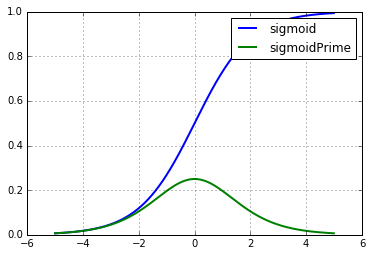

In [78]:
testValues = np.arange(-5,5,0.01)
plot(testValues, sigmoid(testValues), linewidth=2)
plot(testValues, sigmoidPrime(testValues), linewidth=2)
grid(1)
legend(['sigmoid', 'sigmoidPrime'])

Şimdi dyHat/dz3'ü f(z(3))'ün türevi ile değiştirebiliriz.

$$
\frac{\partial z^{(3)}}{\partial W^{(2)}}= 
-(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(2)}}
$$

Son olarak dz3dW2, z'deki de

$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$

Aslında burada matematiksel olarak yaptığımız hesap, her ağırlıktaki hatayı bir adım geriye yaymaya çalışmaktır. Hatayı geriye yayarken, en büyük hataya sahip olan ağırlık değeri, gradyen azalım uyguladığımızda en çok değişecek olan değerlerdir.

Denklemin ilk kısmı için y-yHat  çıkış değerimiz ile aynı boyutta, yani 3'e 1'lik bir matristir.

F(z(3))'ün türevi de aynı olup 3'e 1'lik bir matristir, o yüzden ilk işlemimiz skaler çarpımdır. Sonuç olarak elde edeceğimiz matris de 3'e 1'lik geriyayılım hatası olan delta 3 değeridir.

$$
\frac{\partial J}{\partial W^{(2)}} = 
(a^{(2)})^T\delta^{(3)}\tag{6}
$$

$$
\delta^{(3)} = -(y-\hat{y}) f^\prime(z^{(3)}) 
$$

Her bir örneğimiz bize gradyen azalımın hangi yönde olması gerektiğini ayrı ayrı söylemektedir. 

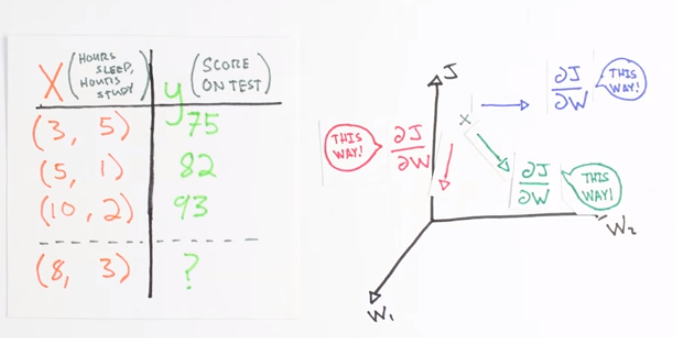

In [79]:
from IPython.display import Image
i = Image(filename='images/toplugradyenazalım.png')
i

In [80]:
def costFunctionPrime(self, X, y):
    #Verilen X ve y için W ve W2'ye göre türev hesapla:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    dJdW2 = np.dot(self.a2.T, delta3)

$$
\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})
\frac{\partial \hat{y}}{\partial W^{(1)}}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})
\frac{\partial \hat{y}}{\partial z^{(3)}}
\frac{\partial z^{(3)}}{\partial W^{(1)}}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = -(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(1)}}
$$

$$
\frac{\partial z^{(3)}}{\partial W^{(1)}} = \frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial W^{(1)}}
$$


$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
\frac{\partial a^{(2)}}{\partial W^{(1)}}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
\frac{\partial a^{(2)}}{\partial z^{(2)}}
\frac{\partial z^{(2)}}{\partial W^{(1)}}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
\frac{\partial z^{(2)}}{\partial W^{(1)}}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = 
X^{T}
\delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
$$

$$
\frac{\partial J}{\partial W^{(1)}} = 
X^{T}\delta^{(2)} \tag{7}
$$

$$
\delta^{(2)} = \delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
$$

Eğer daha derin ağlar elde etmek istiyorsak, burada hesapladığımız gibi, metotları birbirine eklememiz gerekmektedir.

In [81]:
# Whole Class with additions:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2

Şimdi dJ/dW değerini hesaplayarak, optimizasyon uzayında hangi yöne doğru gitmemiz gerektiğini hesaplayabiliriz.

In [82]:
NN = Neural_Network()

In [83]:
cost1 = NN.costFunction(X,y)

In [84]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [85]:
dJdW1

array([[ 0.01721265,  0.05855355, -0.01650194],
       [ 0.01084421,  0.04472681, -0.01274787]])

In [86]:
dJdW2

array([[-0.2126647 ],
       [-0.15672235],
       [-0.17063581]])

In [87]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

In [88]:
print (cost1, cost2)

0.350478940245 0.665296667532


In [89]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [35]:
print (cost2, cost3)

0.585069978632 0.292698670705
